<a href="https://colab.research.google.com/github/SmithaShivakumar/100DaysOfCommits.github.io/blob/master/Laboratory2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 2 - ANLY 535 - 51- B - 2018 

## Team 1 : Chirag Agarwal, Kun Hu, Snigdha Jain and Smitha Shivakumar

--------------------------------------------------------------------------------------------------------------------------------------------------------


# 1. Getting GPU setup


In [1]:
from tensorflow.python.client import device_lib 

 
print("Show System RAM Memory:\n\n") 

!cat /proc/meminfo | egrep "MemTotal*" 


print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13335276 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7323896330840094935
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16091939100513028412
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9800033169367646032
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6091872321629230524
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [34]:
from keras.preprocessing.image import ImageDataGenerator 
 
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True) 
 
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/data/train/', target_size = (50, 50), batch_size = 32, class_mode = 'binary') 

Found 0 images belonging to 0 classes.


In [35]:
import time 
start = time.time() 
!python3 "/content/gdrive/My Drive/Colab Notebooks/mnist_cnn.py" 
end = time.time() 
print(end - start)

Using TensorFlow backend.
11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
2019-01-20 20:28:59.115940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:964] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-01-20 20:28:59.116558: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
totalMemory: 11.17GiB freeMemory: 2.53GiB
2019-01-20 20:28:59.116598: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2019-01-20 20:28:59.496573: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-01-20 20:28:59.496640: I tensorflow/core/

# 2. Implementation of handwritten recognition in Tensorflow using CNN


In this section, we want to rebuild the model that we designed using Keras. This time we will use Tensorflow. 
 
Stat with loading the MNIST into python environment



In [5]:
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data 

mnist = input_data.read_data_sets("/tmp/data/", one_hot = True) 
batch_size = 128 

import matplotlib.pyplot as plt 
import random as ran 
import numpy as np 

# Functions that can define the size of train and test sets 

train_X = mnist.train.images.reshape(-1, 28, 28, 1) 
test_X = mnist.test.images.reshape(-1,28,28,1) 
 
train_y = mnist.train.labels 
test_y = mnist.test.labels 
 
# Now defining the placeholders: 
x = tf.placeholder("float", [None, 28,28,1]) 
y = tf.placeholder("float", [None, 10]) 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

We can define the convolution and max pooling layers as functions. This can help us to easily modify the parameters easier.

In [0]:
def conv2d(x, W, b, strides=1):     
  # Conv2D wrapper, with bias and relu activation     
  x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')     
  x = tf.nn.bias_add(x, b)     
  return tf.nn.relu(x)  
 
def maxpool2d(x, k=2):     
  return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME') 

We want to use following structure for the CNN. We want to have 3 convolutional layer in which each layer has a maxpooling layer with size of 2x2.  
 First Conv layer has 32-3x3 filters 
 Second Conv layer has 64-3x3 filters 
 Third Conv layer has 128-3x3 filters 

The fully connected layer has one layer of 128 nodes and the last layer which is the output one. 

In [0]:
weights = { 
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()),      
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()),      
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()),      
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()),      
    'out': tf.get_variable('W6', shape=(128,10), initializer=tf.contrib.layers.xavier_initializer()),  
    } 

biases = {     
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),     
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),     
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),     
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),     
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()), 
    } 
 

Conv_net() function receives all the above mentioned functions and generates the network.

In [0]:
def conv_net(x, weights, biases):   
  # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.     
  conv1 = conv2d(x, weights['wc1'], biases['bc1'])     
  # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.     
  conv1 = maxpool2d(conv1, k=2) 
  # Convolution Layer     
  # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.     
  conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])     
  # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.     
  conv2 = maxpool2d(conv2, k=2) 
  conv3 = conv2d(conv2, weights['wc3'], biases['bc3']) 
  # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.     
  conv3 = maxpool2d(conv3, k=2) 
  # Fully connected layer     
  # Reshape conv2 output to fit fully connected layer input     
  fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])     
  fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])     
  fc1 = tf.nn.relu(fc1)     
  # Output, class prediction     
  # finally we multiply the fully connected layer with the weights and add a bias term.      
  out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])     
  return out  
  

In [9]:
# The optimization algorithm can be designed as below:

learning_rate = 0.001 
 
pred = conv_net(x, weights, biases) 
 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)) 
 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 
 
#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector. 
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) 
 
#calculate accuracy across all the given images and average them out.  
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
# Finally, we can run the following code to start the algorithm: 
 
init = tf.global_variables_initializer() 
 
epochs = 100 
 
with tf.Session() as sess:     
  sess.run(init)      
  train_loss = []     
  test_loss = []     
  train_accuracy = []     
  test_accuracy = []     
  summary_writer = tf.summary.FileWriter('./Output', sess.graph) 
  for i in range(epochs):         
    for batch in range(len(train_X)//batch_size):             
      batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]             
      batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]                 
      # Run optimization op (backprop).                 
      # Calculate batch loss and accuracy             
      opt = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})             
      loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y})         
    print("Iter " + str(i) + ", Loss= " + \
          "{:.6f}".format(loss) + ", Training Accuracy= " + \
          "{:.5f}".format(acc))         
    print("Optimization Finished!") 
    # Calculate accuracy for all 10000 mnist test images         
    test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})         
    train_loss.append(loss)         
    test_loss.append(valid_loss)         
    train_accuracy.append(acc)         
    test_accuracy.append(test_acc)         
    print("Testing Accuracy:","{:.5f}".format(test_acc))     
  summary_writer.close() 
 

Iter 0, Loss= 0.017792, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.95970
Iter 1, Loss= 0.009853, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98310
Iter 2, Loss= 0.009424, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98740
Iter 3, Loss= 0.002396, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98680
Iter 4, Loss= 0.002182, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98710
Iter 5, Loss= 0.001528, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98950
Iter 6, Loss= 0.000453, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98890
Iter 7, Loss= 0.000414, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.99020
Iter 8, Loss= 0.000466, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98790
Iter 9, Loss= 0.000049, Training Accuracy= 1.00000
Optimization Finished!
Testing Accuracy: 0.98890


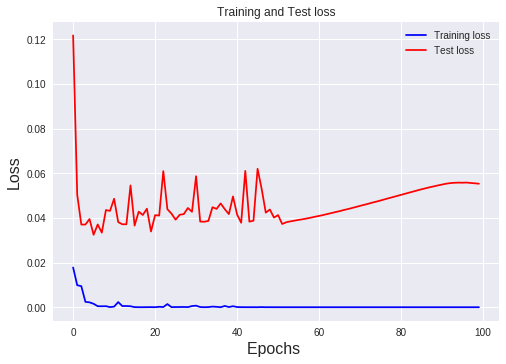

<Figure size 576x396 with 0 Axes>

In [12]:
# You can see the loss and accuracy graphs using following commands: 
import matplotlib.pyplot as plt 
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss') 
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss') 
plt.title('Training and Test loss') 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Loss',fontsize=16) 
plt.legend() 
plt.figure() 
plt.show() 


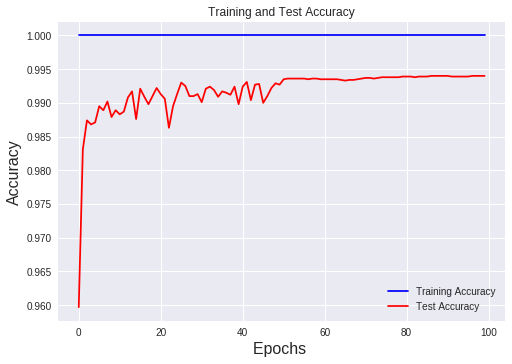

<Figure size 576x396 with 0 Axes>

In [13]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy') 
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy') 
plt.title('Training and Test Accuracy') 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.legend() 
plt.figure() 
plt.show() 

# 3. Text mining using CNN

The majority of this part of lab is coming from Realpython website. 

####3.1. Pre-processing: 
 
For this part of the lab we want to see one of the other applications of CNN which is text mining. The dataset is downloaded from the Sentiment Labelled Sentences Data Set from the UCI Machine Learning Repository.(https://github.com/hallr/DAT_SF_19/tree/master/data) It is also uploaded on Moodle. This data includes labeled overviews from Amazon, Yelp and IMDB. Each review is marked as 0 for negative comment or 1 for positive sentiment. Run following code to see one of the results: 

In [16]:
import pandas as pd 
 
filepath_dict = {'yelp':   '/content/gdrive/My Drive/Colab Notebooks/data/sentiment labelled sentences/yelp_labelled.txt',                  
                 'amazon': '/content/gdrive/My Drive/Colab Notebooks/data/sentiment labelled sentences/amazon_cells_labelled.txt',                  
                 'imdb':   '/content/gdrive/My Drive/Colab Notebooks/data/sentiment labelled sentences/imdb_labelled.txt'} 
 
df_list = [] 
for source, filepath in filepath_dict.items():     
  df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')     
  df['source'] = source  # Add another column filled with the source name     
  df_list.append(df) 
  df = pd.concat(df_list)
  
print(df.iloc[0]) 

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


The way that the dataset is labeled is taught in Sentimental analysis course. The collection of texts (corpus) is analyzed and the frequency of particular word is counted. Then, it is compared to a dictionary to see if it is positive or negative. Feature vector is a vector that contains all the vocabulary words plus their count. Let's see how these vectors are generated. Let's think of the sentences that we have as following vector named sentences: 


```
sentences = ['John likes ice cream', 'John hates chocolate.'] 
```


 
CountVectorizer from scikit-learn library can take these sentences and make this feature vector. This is how it works: 


In [18]:
from sklearn.feature_extraction.text import CountVectorizer 

sentences = ['John likes ice cream', 'John hates chocolate.'] 
vectorizer = CountVectorizer(min_df=0, lowercase=False) 
vectorizer.fit(sentences) 
vectorizer.vocabulary_

{'John': 0, 'chocolate': 1, 'cream': 2, 'hates': 3, 'ice': 4, 'likes': 5}

This vocabulary serves also as an index of each word. Now, you can take each sentence and get the word occurrences of the words based on the previous vocabulary. The vocabulary consists of all five words in our sentences, each representing one word in the vocabulary. When you take the previous two sentences and transform them with the CountVectorizer you will get a vector representing the count of each word of the sentence: 

In [19]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

Now, you can see the resulting feature vectors for each sentence based on the previous vocabulary. For example, if you take a look at the first item, you can see that both vectors have a 1 there. This means that both sentences have one occurrence of John, which is in the first place in the vocabulary. This is called Bag of Words (BOW) model. 

Now getting back to yelp dataset

In [0]:
from sklearn.model_selection import train_test_split 
 
df_yelp = df[df['source'] == 'yelp'] 
 
sentences = df_yelp['sentence'].values 
y = df_yelp['label'].values 
 
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000) 

In [22]:
# We can again use BOW strategy to create vectorized sentences. 

from sklearn.feature_extraction.text import CountVectorizer 
 
vectorizer = CountVectorizer() 
vectorizer.fit(sentences_train) 
 
X_train = vectorizer.transform(sentences_train) 
X_test  = vectorizer.transform(sentences_test) 
X_train 
 
 

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [23]:
# It shows 750 samples which are the number of training samples. 
# Each sample has 1714 dimensions which is the size of the vocabulary. 
# Just as a side note, we really don’t need to always use fancy algorithms. 
# For example here even using a logistic regression model, gives us a reasonable result: 
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression() 
classifier.fit(X_train, y_train) 
score = classifier.score(X_test, y_test) 
 
print("Accuracy:", score) 

Accuracy: 0.796


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
# Now, we can implement a normal DNN: 
from keras.models import Sequential 
from keras import layers 
 
input_dim = X_train.shape[1]  # Number of features 

model = Sequential() 
model.add(layers.Dense(10, input_dim=input_dim, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
 
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_test, y_test), batch_size=10) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=False) 
print("Training Accuracy: {:.4f}".format(accuracy)) 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False) 
print("Testing Accuracy:  {:.4f}".format(accuracy))


Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6866 - acc: 0.5733 - val_loss: 0.6784 - val_acc: 0.6040
Epoch 2/100
750/750 [==============================] - 0s 574us/step - loss: 0.6394 - acc: 0.7880 - val_loss: 0.6444 - val_acc: 0.6760
Epoch 3/100
750/750 [==============================] - 0s 569us/step - loss: 0.5515 - acc: 0.8733 - val_loss: 0.5903 - val_acc: 0.7120
Epoch 4/100
750/750 [==============================] - 0s 584us/step - loss: 0.4417 - acc: 0.9240 - val_loss: 0.5424 - val_acc: 0.7480
Epoch 5/100
750/750 [==============================] - 0s 595us/step - loss: 0.3471 - acc: 0.9427 - val_loss: 0.5085 - val_acc: 0.7680
Epoch 6/100
750/750 [==============================] - 0s 642us/step - loss: 0.2736 - acc: 0.9573 - val_loss: 0.4785 - val_acc: 0.7760
Epoch 7/100
750/750 [==============================] - 0s 632us/step - loss: 0.2191 - acc: 0.9693 - val_loss: 0.4577 - val_acc: 0.7800
Epoch 8/100

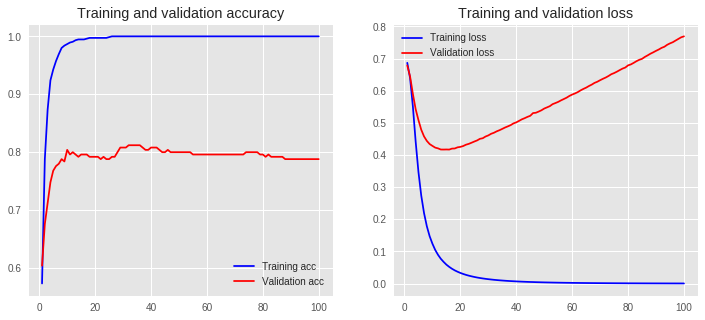

In [25]:
# Let’s draw the learning curves. We can use following function to draw learning curves. 
import matplotlib.pyplot as plt 
plt.style.use('ggplot') 
 
def plot_history(history):     
  acc = history.history['acc']     
  val_acc = history.history['val_acc']     
  loss = history.history['loss']     
  val_loss = history.history['val_loss']     
  x = range(1, len(acc) + 1) 
 
  plt.figure(figsize=(12, 5))     
  plt.subplot(1, 2, 1)     
  plt.plot(x, acc, 'b', label='Training acc')     
  plt.plot(x, val_acc, 'r', label='Validation acc')     
  plt.title('Training and validation accuracy')     
  plt.legend()     
  plt.subplot(1, 2, 2)     
  plt.plot(x, loss, 'b', label='Training loss')     
  plt.plot(x, val_loss, 'r', label='Validation loss')     
  plt.title('Training and validation loss')     
  plt.legend()     
  plt.show() 
  
plot_history(history)

#### 3.2 Embedded Word

Text is considered a form of sequence data similar to time series data that you would have in weather data or financial data. In the previous BOW model, you have seen how to represent a whole sequence of words as a single feature vector. Now you will see how to represent each word as vectors. There are various ways to vectorize text, such as: 
 Words represented by each word as a vector
 Characters represented by each character as a vector 
 N-grams of words/characters represented as a vector (N-grams are overlapping groups of multiple succeeding words/characters in the text) 

Data pre-processing steps: 

In [26]:
from keras.preprocessing.text import Tokenizer 
 
tokenizer = Tokenizer(num_words=5000) 
tokenizer.fit_on_texts(sentences_train) 
 
X_train = tokenizer.texts_to_sequences(sentences_train) 
X_test = tokenizer.texts_to_sequences(sentences_test) 

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index 
 
print(sentences_train[2]) 
print(X_train[2]) 

Of all the dishes, the salmon was the best, but all were great.
[11, 43, 1, 171, 1, 283, 3, 1, 47, 26, 43, 24, 22]


The indexing is ordered after the most common words in the text, which you can see by the word the having the index 1. It is important to note that the index 0 is reserved and is not assigned to any word. This zero index is used for padding, which I’ll introduce in a moment. 


Unknown words (words that are not in the vocabulary) are denoted in Keras with word_count + 1 since they can also hold some information. You can see the index of each word by taking a look at the word_index dictionary of the Tokenizer object:

In [27]:
for word in ['the', 'all', 'happy', 'sad']:      
  print('{}: {}'.format(word, tokenizer.word_index[word])) 

the: 1
all: 43
happy: 320
sad: 450


With CountVectorizer, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). With Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index. 


We can add a parameter to identify how long each sequence should be. 

In [28]:
from keras.preprocessing.sequence import pad_sequences 
 
maxlen = 100 
 
# Pad variables with zeros  
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) 
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen) 
print(X_train[0, :]) 

[  1  10   3 282 739  25   8 208  30  64 459 230  13   1 124   5 231   8
  58   5  67   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


#### 3.3 Model training 

In [30]:
# We can now start training the model: 
from keras.models import Sequential 
from keras import layers 
 
embedding_dim = 50 
 
model = Sequential() 
model.add(layers.Embedding(input_dim=vocab_size,                             
                          output_dim=embedding_dim, input_length=maxlen)) 
model.add(layers.GlobalMaxPool1D()) 
model.add(layers.Dense(10, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           87350     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 87,871
Trainable params: 87,871
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8000


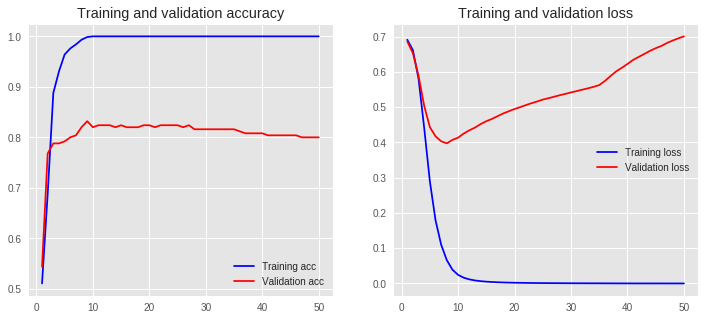

In [31]:
# And evaluate the model with: 
history = model.fit(X_train, y_train, epochs=50, verbose=False,                     
                    validation_data=(X_test, y_test), batch_size=10) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=False) 
print("Training Accuracy: {:.4f}".format(accuracy)) 
loss, accuracy = model.evaluate(X_test, y_test, verbose=False) 
print("Testing Accuracy:  {:.4f}".format(accuracy)) 
plot_history(history) 

# 4. Implementing Cat vs Dog in Tensorflow using CNN


In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/data/train', target_size = (50, 50), 
                                                 batch_size = 32, class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/data/test1', target_size = (50, 50),
                                            batch_size = 32, class_mode = 'binary') # not sure why there are 0 images!

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [0]:
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
# Model design
# Initialising the CNN
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))

# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

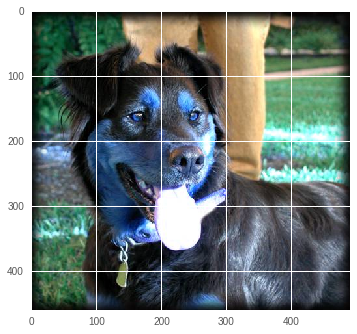

This is a dog


In [42]:
import cv2
# 1 is dog and 0 is cat
img = cv2.imread("/content/gdrive/My Drive/Colab Notebooks/data/test/190.jpg")
plt.imshow(img) 
plt.show()  # display it
img = cv2.resize(img,(50,50))
img = img.reshape(1,50,50,3)
if (model.predict(img).item()):
  print ("This is a dog")
else:
  print ("This is a cat") 

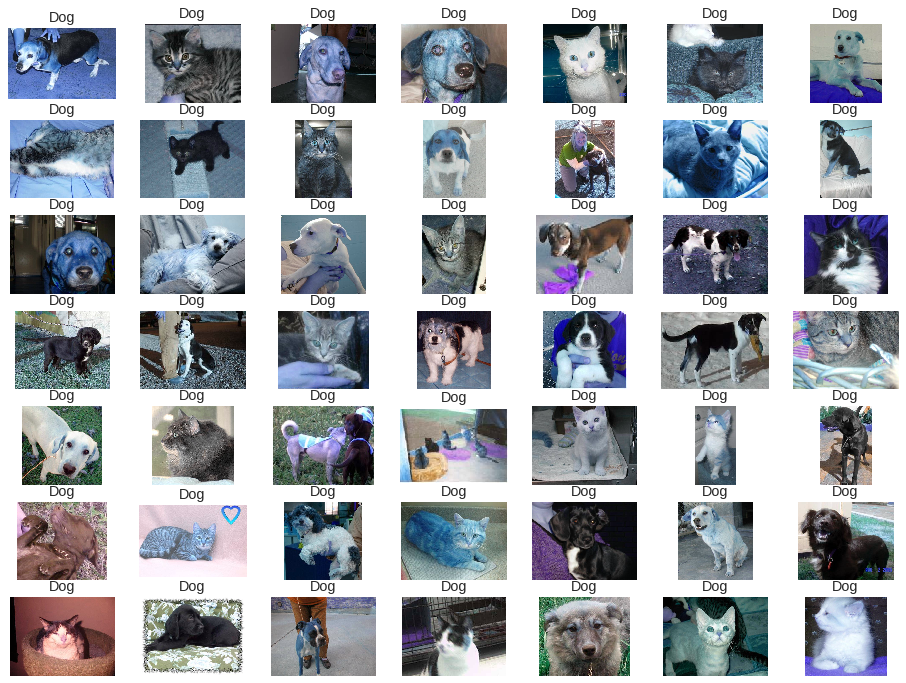

In [48]:
fig=plt.figure(figsize=(16, 12))
num=0

for i in range(201,250):
    y = fig.add_subplot(7, 7, num+1)
    img = cv2.imread("/content/gdrive/My Drive/Colab Notebooks/data/test1/"+str(i)+".jpg")
    y.imshow(img) 
    #plt.show()  # display it
    img = cv2.resize(img,(50,50))
    img = img.reshape(1,50,50,3)
    if (model.predict(img).item()):
      pred = "Dog"
    else:
      pred = "Cat"
    
    plt.title(pred)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    num = num+1
plt.show()

#### This model has about 50% accuracy in its classification